## Logistic Regression

>- 계산한 값이 0보다 작은 클래스는 -1, 0보다 큰 클래스는 1로 설정(==예측)
>- 분류용 선형모델에서는 직선이 곧 선형 경계이다. (선형경계: 분류를 예측하기 위한 클래스의 구분선) 

## 와인 데이터를 이용한 분류

>- 포르투칼 비뉴 베르드 지방에서 만들어진 와인을 측정해서 얻은 데이터
>- 데이터셋의 구성
>>- 1,599개의 레드와인 데이터, 4,88개의 화이트와인 데이터로 구성 (총 6,497개의 데이터)
>>- 12개의 정보와 1개의 클래스로 구성

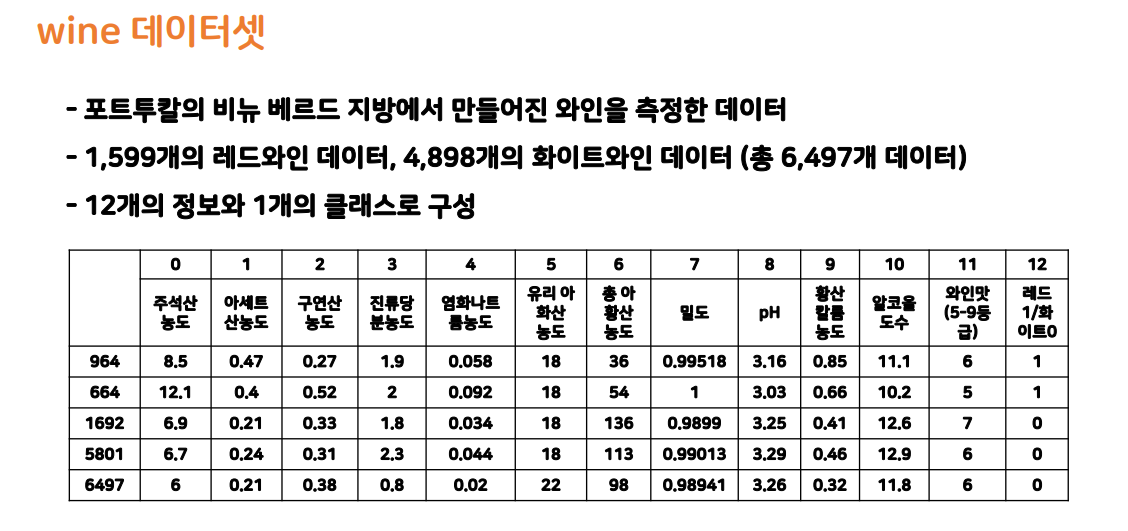

In [41]:
import warnings  

warnings.filterwarnings("ignore")  #모든 경고 문구 출력하지 말고 무시해라!

In [42]:
import pandas as pd

# 와인데이터를 로드한다
#header안쓰면 첫번째데이터가  컬럼명으로 설정되어버림
wine = pd.read_csv('./Data/wine.csv', header = None) 
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [43]:
from sklearn.model_selection import train_test_split

x_data = wine.iloc[:, 0:-1]
y_data = wine.iloc[:,   -1]

#훈련, 검증 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, 
                                                    test_size = 0.3,
                                                    random_state = 42)

### 모델 선택 및 훈련

In [44]:
# 모델사용을 위해 로지스틱 회귀모듈을 import한다
from sklearn.linear_model import LogisticRegression

# C = 규제의 강도값이 작을수록 규제강도가 크다, 클수록 작다), 
# max_iter=최대반복횟수
lr_model_wine = LogisticRegression(C=0.01, max_iter=15000)
lr_model_wine.fit(X_train, y_train)  #훈련 실시
 
lr_model_wine.score(X_train, y_train)  #스코어도출

0.9502968990543216

In [45]:
lr_model_wine.score(X_test, y_test)  #스코어도출

0.9415384615384615

In [46]:
y_pred = lr_model_wine.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### 최적의 C값을 찾아보자

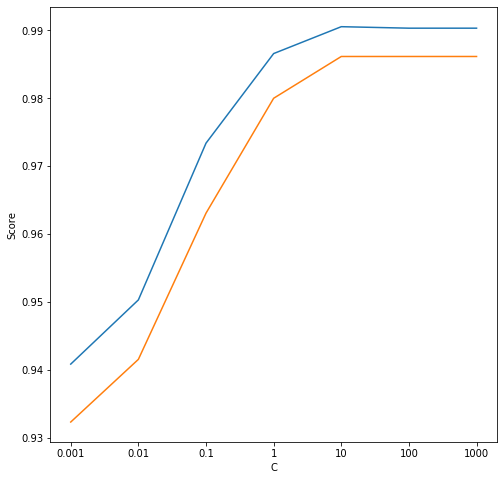

In [47]:
import matplotlib.pyplot as plt

train_acc = []
test_acc = []

c_list = ['0.001','0.01','0.1','1','10','100','1000']

for i in c_list:
    lr_model = LogisticRegression( C = float(i), max_iter = 15000)
    lr_model.fit(X_train, y_train)
    train_acc.append(lr_model.score(X_train, y_train))
    test_acc.append(lr_model.score(X_test, y_test))
    
plt.figure(figsize=(8,8))
plt.plot(c_list, train_acc, label='Train score')
plt.plot(c_list, test_acc,  label='Test score')
plt.xlabel('C')
plt.ylabel('Score')
plt.show()

* c_list '사이의 값'들은 출렁일수도 반듯할 수도 있음
규제가 심할때(0.001..) __ 과대적합이 완화됨(why? 특성이 적어져서___ 너무 적어지면 과소적합에 빠질수도?)
규제를 완화시킬수록 (~1000) __ 모든데이터를 수렴하여 그래프그리려고 하여 과대적합 가능성 up 

## 교차검증을 적용해보자

In [48]:
from sklearn.model_selection import cross_val_score

#교차검증 = cross_val_score(학습모델, 학습데이터, 정답데이터, 교차검증 분할값)
result = cross_val_score(lr_model_wine, X_train, y_train, cv = 5)
result.mean()

0.948976172342509

### Logistic Regression 특징

>- C값에 의해 규제를 수행 (C값이 작을수록 강한 규제다. C값이 클수록 약한 규제다)
>- L1 규제를 기본으로 L2규제까지 같이 적용된다.
>- 매우 큰 데이터에서 잘 작동하고 희소 데이터셋(데이터 값이(eg.,0) 작은 데이터셋)에서도 잘 작동한다
>- 작은 데이터셋에서는 성능이 좋지 않을수도 있다.

<hr>
<hr>

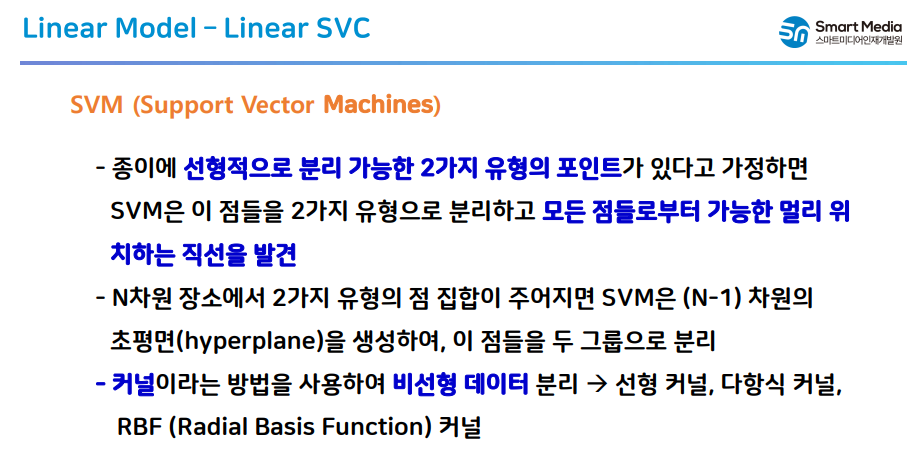

## LinearSVC

In [49]:
from sklearn.svm import LinearSVC     #선형 SVM 모듈을 불러온다

svc_model_wine = LinearSVC(C=0.01)     # 모델 생성 (C==규제강도)
svc_model_wine.fit(X_train, y_train)   # 훈련 실시

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [50]:
svc_model_wine.score(X_test, y_test)  # 모델 평가

0.9646153846153847

In [51]:
pred = svc_model_wine.predict(X_test)

In [52]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

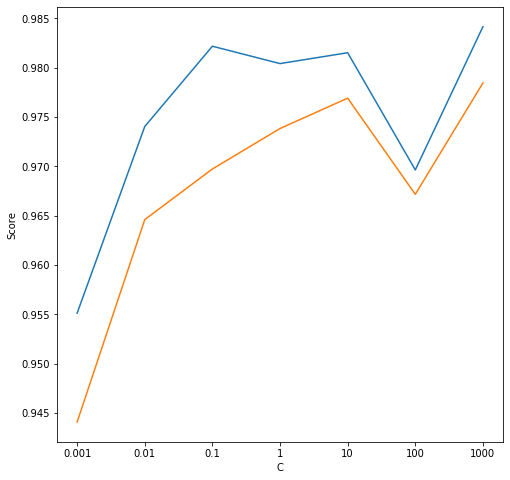

In [53]:
import matplotlib.pyplot as plt

train_acc = []
test_acc = []

c_list = ['0.001','0.01','0.1','1','10','100','1000']

for i in c_list:
    lr_model = LinearSVC( C = float(i))
    lr_model.fit(X_train, y_train)
    train_acc.append(lr_model.score(X_train, y_train))
    test_acc.append(lr_model.score(X_test, y_test))
    
plt.figure(figsize=(8,8))
plt.plot(c_list, train_acc, label='Train score')
plt.plot(c_list, test_acc,  label='Test score')
plt.xlabel('C')
plt.ylabel('Score')
plt.show()

## Linear SVC와 Logistic Regression의 장단점

>- 선형 모델의 주요 매개변수는 회귀모델에서는 alpha였고 Linear SVC, Logistic Regression에서는 C이다
>- alpha 값은 클수록 규제가 커지고, C값은 클수록 규제가 작아진다.
>- 회귀모델에서는 이 매개변수의 적절한 값을 찾는 것이 매우 중요하다.
>- L1규제를 사용할지 L2규제를 사용할지 결정해야 한다 
>- 중요한 특성이 많지 않다고 판단되면 L1규제를 사용, 그렇지 않으면 L2규제를 (오차제곱해서 튀는데이터 눌러주고자 할 때) 사용함
>- 선형 모델은 학습 속도가 빠르고 예측도 빠르다

## GridSearch

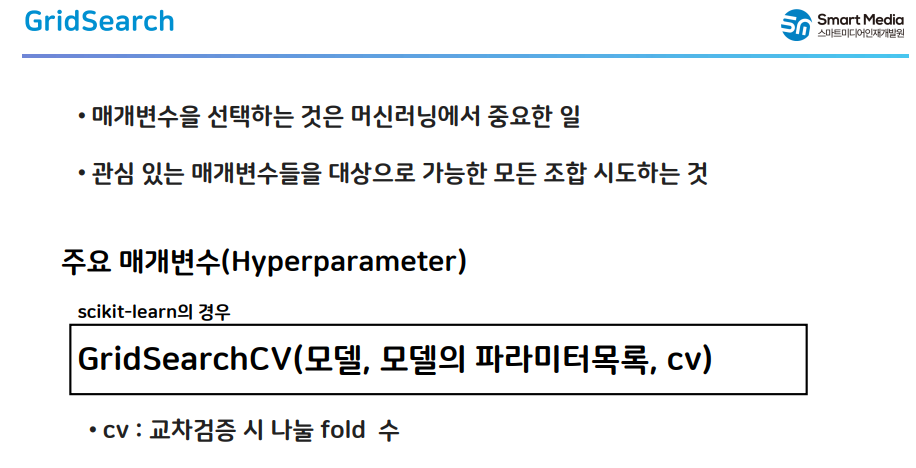

### GridSearchCV 메소드를 사용하여 그리드 서치 수행
>- GridSearch 기능과 교차검증 기능을 동시에 수행함

In [54]:
# 딕셔너리 형태로 파라미터의 값들을 설정
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100] }

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# GridSearchCV(학습모델, 하이퍼파라미터 딕셔너리, cv=교차검증 분할 갯수)
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)

In [56]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

- GridSearchCV객체에 fit() 메서드는 최적의 매개변수를 찾는 일 뿐만 아니라 교차 검증 성능이 가장 좋은 매개변수로 전체 훈련 데이터 세트에 대해 새로운 모델은 자동으로 만듦

- GridSearchCV는 전체 데이터로 학습한 모델에 접근할 수 있도록 predict(), score() 메소드를 제공함

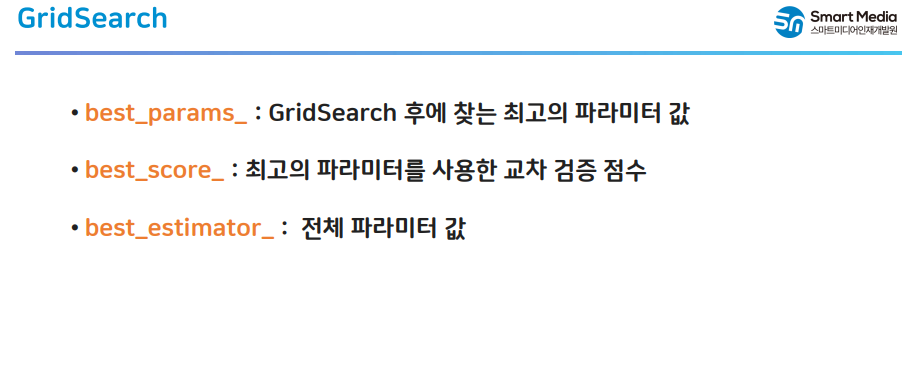

In [57]:
print("테스트 세트 점수 : {:.2f}".format(grid_search.score(X_test, y_test)))

테스트 세트 점수 : 0.97


In [58]:
print("최적 매개변수 : {}".format(grid_search.best_params_))
print("최고 교차 검증 점수 : {}".format(grid_search.best_score_))

최적 매개변수 : {'C': 10}
최고 교차 검증 점수 : 0.9727272727272727


In [59]:
print("최고 성능 모델 :\n {}".format(grid_search.best_estimator_))

최고 성능 모델 :
 LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


## DecisionTree 모델의 최적 파라메터 찾기 (max_depth, leaf_nodes, min_sample_leaf)

In [60]:
iris.data.shape

(150, 4)

In [63]:
from sklearn.tree import DecisionTreeClassifier

param = {'max_depth': range(1,5), 'max_leaf_nodes': range(1,50,10), 'min_samples_leaf':range(1,50,10)}
#
grid_search = GridSearchCV(DecisionTreeClassifier(), param, cv=5)

iris = load_iris() #꼭써야하는건 아니지만 확실하게 하려 써줬음
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 5),
                         'm

In [64]:
print( "최적 매개변수 : {}".format( grid_search.best_params_))
print( "최고 교차 검증 점수  : {}".format( grid_search.best_score_))

최적 매개변수 : {'max_depth': 3, 'max_leaf_nodes': 11, 'min_samples_leaf': 1}
최고 교차 검증 점수  : 0.9644268774703558
